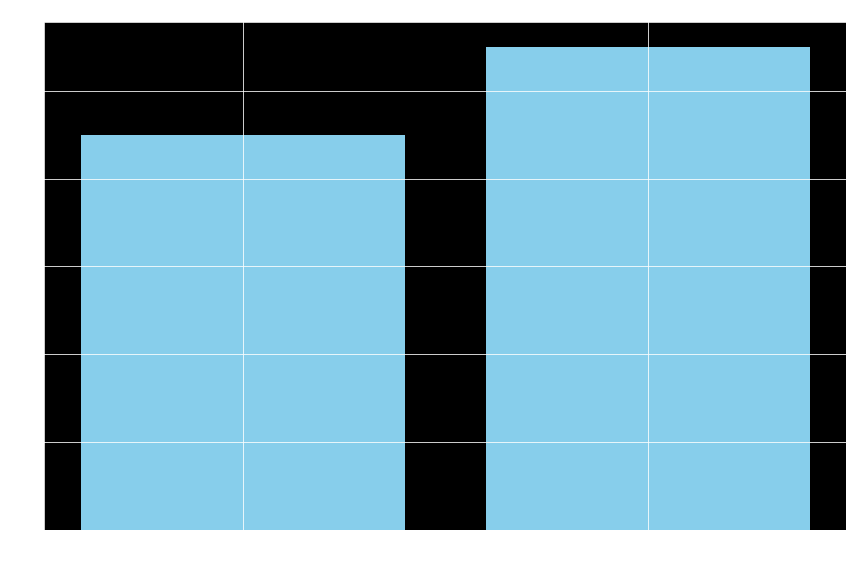

数据已处理并保存至: processed_data_with_topsis.xlsx
条形图已保存至 topsis_scores.png
权重是：
9: 0.2
10: 0.2
175: 0.2
120: 0.2
TOPSIS_Score: 0.2


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# 从Excel文件中读取数据
file_path = r"D:\vscode\code\数学建模算法\2_评价决策类_TOPSIS法\processed_data_with_topsis.xlsx"
data = pd.read_excel(file_path)
 
# 数据标准化为极大型指标
def standardize_data(df, min_columns):
    for column in df.columns:
        max_val = df[column].max()
        min_val = df[column].min()
        if column in min_columns:  # 极小型指标
            df[column] = (max_val - df[column]) / (max_val - min_val)
        else:  # 极大型指标
            df[column] = (df[column] - min_val) / (max_val - min_val)
    return df
 
# 计算熵权
def calculate_entropy_weights(df):
    prob_matrix = df.div(df.sum(axis=0), axis=1)
    entropy = -np.sum(prob_matrix * np.log(prob_matrix + np.finfo(float).eps), axis=0) / np.log(len(df))
    weights = (1 - entropy) / (1 - entropy).sum()
    return weights
 
# 执行TOPSIS算法
def topsis(df, weights):
    normalized_df = df.div(np.sqrt((df ** 2).sum(axis=0)), axis=1)
    weighted_normalized_df = normalized_df.mul(weights, axis=1)
    ideal_best = weighted_normalized_df.max()
    ideal_worst = weighted_normalized_df.min()
    distance_to_best = np.sqrt(((weighted_normalized_df - ideal_best) ** 2).sum(axis=1))
    distance_to_worst = np.sqrt(((weighted_normalized_df - ideal_worst) ** 2).sum(axis=1))
    relative_closeness = distance_to_worst / (distance_to_best + distance_to_worst)
    return relative_closeness
 
# 从用户输入中获取极小型指标的列索引
min_columns_input = input("请输入极小型指标的列索引，用空格分隔: ").split()
min_columns_index = [int(i) for i in min_columns_input]  # 将输入的列索引直接使用
 
# 根据索引获取极小型指标的列名
min_columns = [data.columns[i-1] for i in min_columns_index]
 
# 主流程
standardized_data = standardize_data(data.copy(), min_columns)
weights = calculate_entropy_weights(standardized_data)
 
# 确保所有列的权重都被计算
weights_series = pd.Series(weights, index=standardized_data.columns)
 
topsis_scores = topsis(standardized_data, weights)
 
# 添加TOPSIS得分到原始数据
data['TOPSIS_Score'] = topsis_scores
 
# 保存结果
output_path = 'processed_data_with_topsis.xlsx'
data.to_excel(output_path, index=False)
 
# 可视化
plt.figure(figsize=(12, 8))
plt.bar(range(1, len(data) + 1), data['TOPSIS_Score'], color='skyblue')
plt.xlabel('Sample Index')
plt.ylabel('TOPSIS Score')
plt.title('TOPSIS Scores of Samples')
plt.xticks(range(1, len(data) + 1))
plt.grid(True)
plt.tight_layout()
plt.savefig('topsis_scores.png', format='png', dpi=300)
plt.show()
 
print("数据已处理并保存至:", output_path)
print("条形图已保存至 topsis_scores.png")
print("权重是：")
for col, weight in weights_series.items():
    print(f'{col}: {weight}')